In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

In [ ]:
uni_df = pd.read_csv('./data/ch5/Universities_imputed_reduced.csv')
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   College Name           1302 non-null   object 
 1   State                  1302 non-null   object 
 2   Public/Private         1302 non-null   object 
 3   num_appli_rec          1302 non-null   int64  
 4   num_appl_accepted      1302 non-null   int64  
 5   num_new_stud_enrolled  1302 non-null   int64  
 6   in-state tuition       1302 non-null   int64  
 7   out-of-state tuition   1302 non-null   int64  
 8   % fac. w/PHD           1302 non-null   int64  
 9   stud./fac. ratio       1302 non-null   float64
 10  Graduation rate        1302 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 112.0+ KB


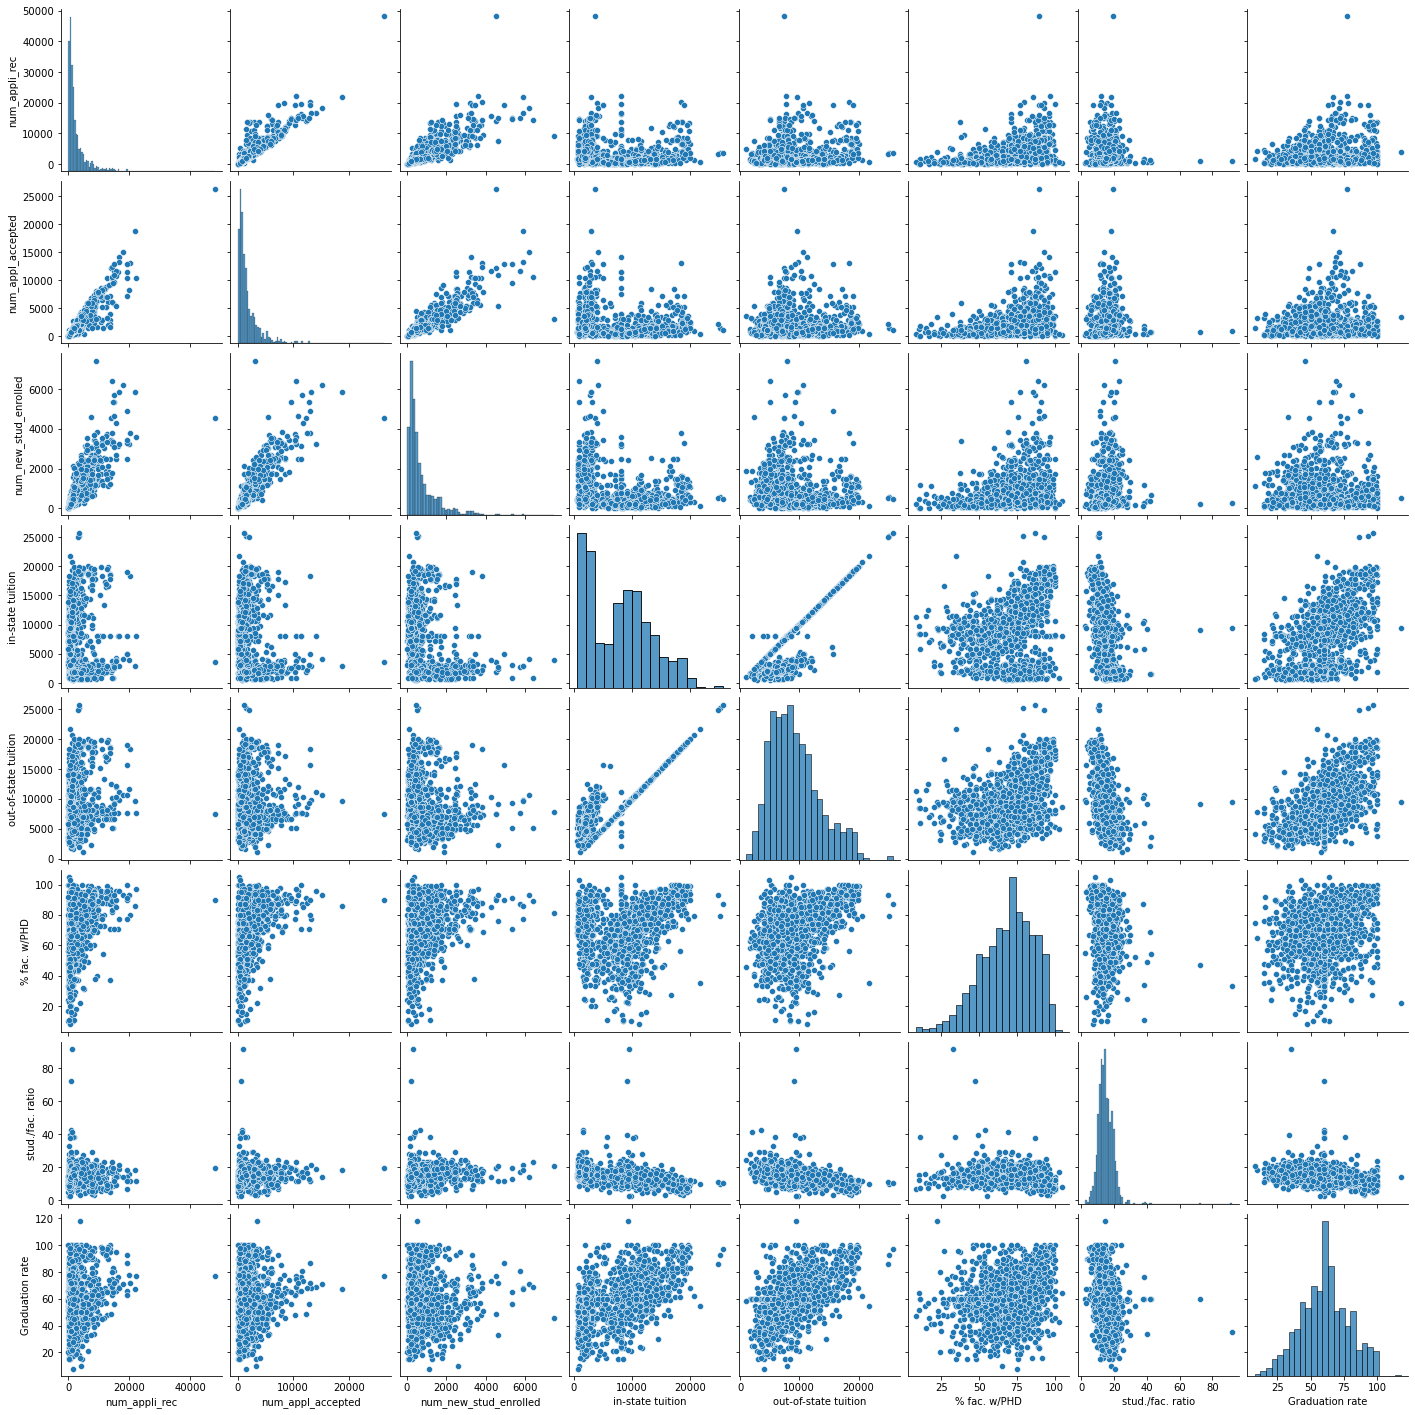

In [ ]:
sns.pairplot(uni_df, palette='k')

In [ ]:
adult_df = pd.read_csv('data/ch5/adult.csv')
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capitalGain     32561 non-null  int64 
 11  capitalLoss     32561 non-null  int64 
 12  hoursPerWeek    32561 non-null  int64 
 13  nativeCountry   31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
contingency_tbl = pd.crosstab(adult_df.income, adult_df.sex)
contingency_tbl

sex,Female,Male
income,,
<=50K,9592,15128
>50K,1179,6662


### Heatmap은 값의 개별 확률을 확인할 때 사용하는구나.
### Heatmap = Contingency Table

* annot은 네모 박스 안에 숫자를 표현함
* annot과 cmap은 색을 조절함


sex       Female      Male
income                    
<=50K   0.890539  0.694263
>50K    0.109461  0.305737


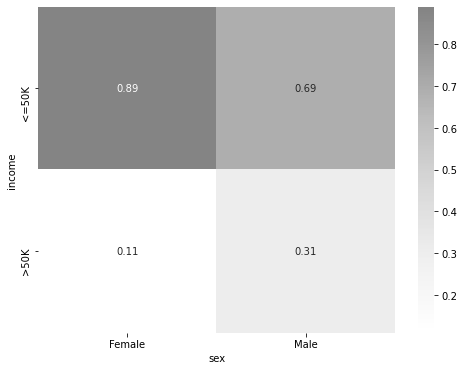

In [ ]:
plt.figure(figsize=(8,6))
probability_tbl = contingency_tbl /contingency_tbl.sum()
print(probability_tbl)
sns.heatmap(probability_tbl, annot=True, center=0.8, cmap="Greys")
plt.show()

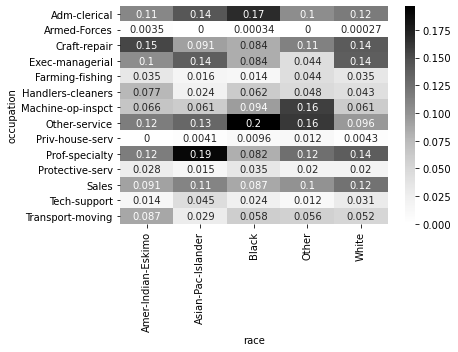

In [ ]:
contingency_tbl = pd.crosstab(adult_df.occupation,adult_df.race)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, cmap='Greys')
plt.show()

### Discretization : Numerical => Categorical 
* pd.cut()은 분류기준이 되는 값 N개를 임의로 선정하는 method임.

<AxesSubplot:xlabel='race', ylabel='age'>

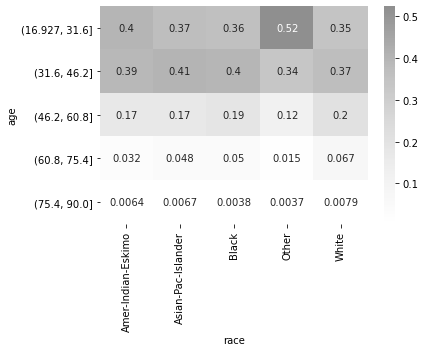

In [ ]:
# pd. cut devides numerical attributes into 5 categorical class.
age_discretized = pd.cut(adult_df.age, bins =5)
contingency_tbl = pd.crosstab(age_discretized, adult_df.race)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, center=0.5, cmap="Greys")

![types_of_attributes](./data/ch5/types_of_attributes.png) <br>

ordinal = by order <br>
nominal = noun

In [ ]:
adult_df.groupby(['education-num','education']).size()

education-num  education   
1              Preschool          51
2              1st-4th           168
3              5th-6th           333
4              7th-8th           646
5              9th               514
6              10th              933
7              11th             1175
8              12th              433
9              HS-grad         10501
10             Some-college     7291
11             Assoc-voc        1382
12             Assoc-acdm       1067
13             Bachelors        5355
14             Masters          1723
15             Prof-school       576
16             Doctorate         413
dtype: int64

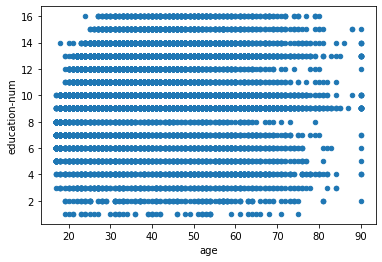

In [ ]:
## 두 개의 attribute가 관련 없음이 확인됨
adult_df.plot.scatter(x='age', y='education-num')
plt.show()

### heatmap X,Y축 원하는 방식으로 설정하기

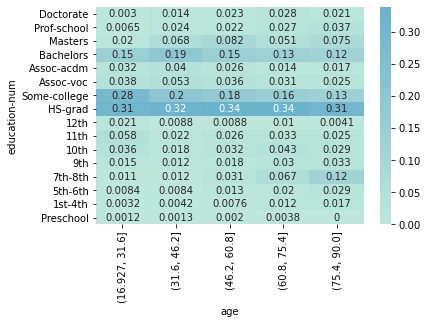

In [ ]:
age_discretized = pd.cut(adult_df.age, bins = 5)
contingency_tbl = pd.crosstab(adult_df['education-num'], age_discretized)
probability_tbl = contingency_tbl / contingency_tbl.sum()

y = adult_df[['education','education-num']].sort_values(by='education-num')
yticks = y.education.unique()

ax = sns.heatmap(probability_tbl, annot=True, center = 1.5, yticklabels=yticks)
ax.invert_yaxis()

### 행열 지우기 
drop(지우고 싶은 부분,axis =0(행) or 1(열), inplace =True or False)

In [ ]:
age_discretized = pd.cut(adult_df.age, bins = 5)
education_sort = adult_df[['age', 'education','education-num']].sort_values(by='education-num').drop('education-num', axis = 1)

# print(age_discretized)
print(type(adult_df.education))
print(type(education_sort))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### Dimension 추가하기

In [ ]:
country_df = pd.read_csv('data/ch5/WH Report_preprocessed.csv')
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              1220 non-null   object 
 1   Continent                         1220 non-null   object 
 2   year                              1220 non-null   int64  
 3   population                        1220 non-null   float64
 4   Life_Ladder                       1220 non-null   float64
 5   Log_GDP_per_capita                1220 non-null   float64
 6   Social_support                    1220 non-null   float64
 7   Healthy_life_expectancy_at_birth  1220 non-null   float64
 8   Freedom_to_make_life_choices      1220 non-null   float64
 9   Generosity                        1220 non-null   float64
 10  Perceptions_of_corruption         1220 non-null   float64
 11  Positive_affect                   1220 non-null   float64
 12  Negati

.text()로 Plot안에 원하는 내용을 포함할 수 있음.plt

* Subplot을 사용할 경우에는 밑바탕이 되는 plot을 변수로 지정한다음 text method를 사용해야함.
* x축과 Y축은 비율로 움직이기 때문에 퍼센티지라 생각하고 값을 조정해야함.
* 공식문서에 있는 **kwargs는 옵션 값이니 필요한 기능을 찾아서 활용하자. || [경로](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.text.html)

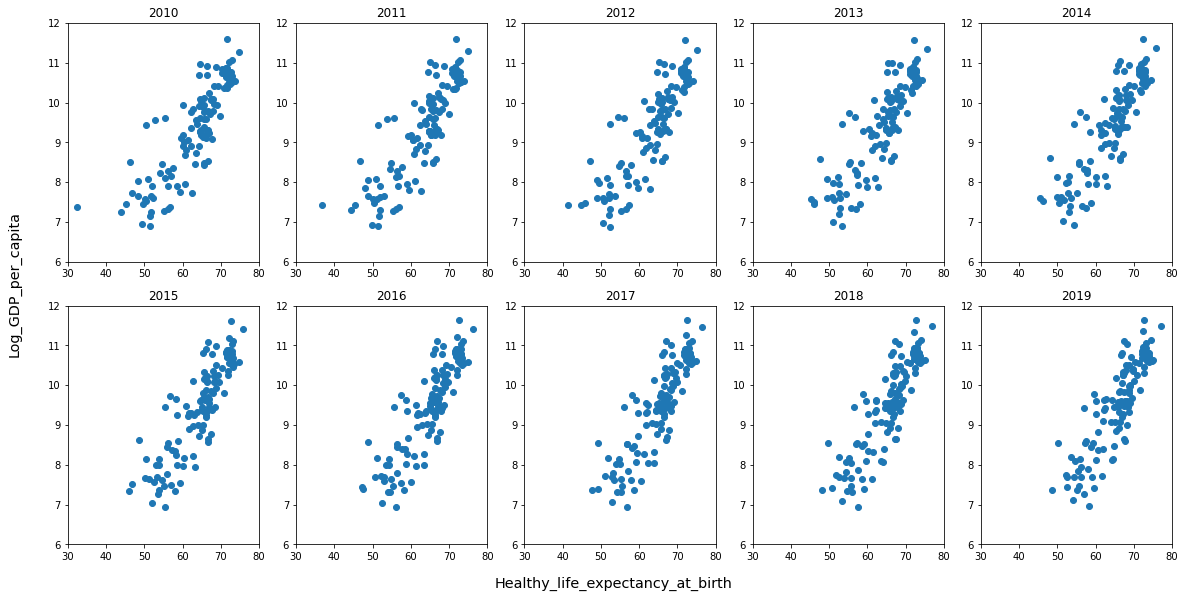

In [ ]:
fig = plt.figure(figsize=(16,8))
year_poss = country_df.year.unique()
for i, yr in enumerate(year_poss) : 
    BM = country_df.year == yr
    x = country_df[BM].Healthy_life_expectancy_at_birth
    y = country_df[BM].Log_GDP_per_capita
    plt.subplot(2,5,i+1)
    plt.scatter(x,y)
    plt.title(yr)
    plt.xlim([30,80])
    plt.ylim([6, 12])
# Set common labels
# fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center')
fig.text(-0.02,0.5, 'Log_GDP_per_capita', ha='center', va='center', rotation='vertical',fontsize='x-large')
fig.text(0.5,-0.02, 'Healthy_life_expectancy_at_birth', ha='center', va='center' ,fontsize='x-large')
plt.tight_layout()

plt.show()

In [ ]:
def plotyear(year):
    BM = country_df.year == year
    x = country_df[BM].Healthy_life_expectancy_at_birth
    y = country_df[BM].Log_GDP_per_capita
    plt.scatter(x,y)
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6, 12])
    plt.show()


### Interact 만들기

In [ ]:
from ipywidgets import interact, widgets


In [ ]:
continent_poss = country_df.Continent.unique()
lst_color =['b','g','r','c','m','y','k']
plt.figure(figsize=[10,10])
def plotyear(year) :
    BM1 = (country_df.year == year)
    for i in range(len(continent_poss)) :
        country_df.sort_values(['population'], inplace=True, ascending=False)
        BM2 = (country_df.Continent == continent_poss[i])
        BM = BM1 & BM2
        size = country_df[BM].population/200000
        x = country_df[BM].Healthy_life_expectancy_at_birth
        y = country_df[BM].Log_GDP_per_capita
        plt.scatter(x,y,c=lst_color[i], marker='o', linewidths=0.5, edgecolors='k', s=size, label =continent_poss[i])
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(markerscale = 0.4)
    plt.show()
# plotyear(2019)
interact(plotyear, year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

<Figure size 720x720 with 0 Axes>

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

### Inplace True 의미
* Inplace를 True로 설정하고 실행하면 None이 반환됩니다. 아무것도 반환할게 없다는거죠.
* 건드린 원본을 보면 처음 불러왔을때와 모습이 다르다는 것을 알 수 있습니다. 
* 즉 Inplace = True는 기존에 있는 dataframe이나 series를 직접 수정한다는 말입니다.

In [ ]:
BM1 = (country_df.year == 2010)
BM2 = (country_df.Continent == "Asia")
BM = BM1 & BM2
country_df[BM][['Name','Healthy_life_expectancy_at_birth']].sort_values('Healthy_life_expectancy_at_birth', ascending=False)


,Name,Healthy_life_expectancy_at_birth
980,Singapore,74.80
550,Japan,73.80
530,Israel,72.40
240,China,67.60
1190,Vietnam,66.50
1140,United Arab Emirates,66.40
80,Bahrain,66.30
1020,Sri Lanka,66.10
680,Malaysia,65.60
1070,Thailand,65.50


### linePlot 그리기
### Legend 이동하기 (Bounding Box)

Continent  year
Asia       2010    0.757500
           2019    0.710643
Name: Perceptions_of_corruption, dtype: float64


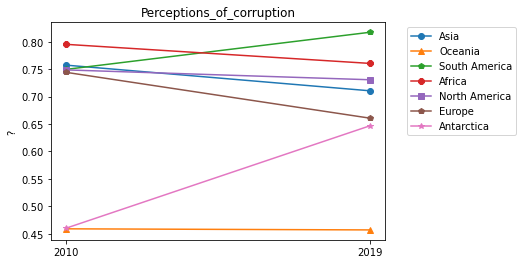

In [ ]:
continent_poss = country_df.Continent.unique()
bycontinentyear_df = country_df.groupby(['Continent', 'year'])['Perceptions_of_corruption'].mean()
print(bycontinentyear_df.loc['Asia',[2010,2019]])
markers_options = ['o','^','p','8','s','p','*']
for i, c in enumerate(continent_poss):
    plt.plot([2010,2019], bycontinentyear_df.loc[c,[2010,2019]], label=c, marker = markers_options[i])
plt.xticks([2010,2019])
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Perceptions_of_corruption')
plt.ylabel('?')
plt.show()

### Groupby method
* .max() : 가장 빈도가 높은 값
* .min() : 가장 빈도가 낮은 값
* .size() : 개수
* .mean() : 평균

In [ ]:
a = bycontinentyear_df = country_df.groupby(['Continent', 'year'])['Perceptions_of_corruption'].size()
print(a)

Continent      year
Africa         2010    30
               2011    30
               2012    30
               2013    30
               2014    30
                       ..
South America  2015     9
               2016     9
               2017     9
               2018     9
               2019     9
Name: Perceptions_of_corruption, Length: 70, dtype: int64
